# Survivalibility on Mt. Everest

## Programming for Data Analysis Project 1

## Author: David Higgins - G00411302

"Getting to the top is optional. Getting down is mandatory."

\- Ed Viesturs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn.neighbors as nei

N = 2000

We first import the Mt. Everest Ascent dataset to understand what information is available for mountaineers and to get an idea of the shape of that data.

In [2]:
df = pd.read_csv("Mt_Everest_Ascent_Data.csv")
df.head()

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Edmund Percival Hillary,1953,Spr,29-May,11:30,New Zealand,M,33,Y,.,Nepal
1,EVER,Tenzing Norgay,1953,Spr,29-May,11:30,India,M,39,Y,.,Nepal
2,EVER,Hans-Rudolf Von Gunten,1956,Spr,24-May,11:00,Switzerland,M,27,Y,.,Nepal
3,EVER,Juerg P. Marmet,1956,Spr,23-May,14:00,Switzerland,M,28,Y,.,Nepal
4,EVER,Ernst Schmied,1956,Spr,23-May,14:00,Switzerland,M,31,Y,.,Nepal


In [3]:
dfml = df.replace(['Spr', 'Sum', 'Aut', 'Win', 'Y', 'No', '.'], [1, 2, 3, 4, 1, 0, 0])
dfml

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Edmund Percival Hillary,1953,1,29-May,11:30,New Zealand,M,33,1,0,Nepal
1,EVER,Tenzing Norgay,1953,1,29-May,11:30,India,M,39,1,0,Nepal
2,EVER,Hans-Rudolf Von Gunten,1956,1,24-May,11:00,Switzerland,M,27,1,0,Nepal
3,EVER,Juerg P. Marmet,1956,1,23-May,14:00,Switzerland,M,28,1,0,Nepal
4,EVER,Ernst Schmied,1956,1,23-May,14:00,Switzerland,M,31,1,0,Nepal
...,...,...,...,...,...,...,...,...,...,...,...,...
10005,EVER,Phurbu Dhondup (Big),2020,1,27-May,NaN,China,M,43,1,0,China
10006,EVER,Fu-Qing (Jing-Yang) Li,2020,1,27-May,NaN,China,M,43,1,0,China
10007,EVER,Ci Luo (Tselo),2020,1,27-May,NaN,China,M,45,1,0,China
10008,EVER,Zhou-Ping Cui,2020,1,28-May,NaN,China,F,45,1,0,China


We can create a Data Series containing just the age values. It's then possible to use the describe() method to find out the mean and standard deviation of the ages of summitters.

In [4]:
ages = dfml.loc[:,'Age']
ages.describe()

count    10010.000000
mean        35.293906
std          9.314089
min         13.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         80.000000
Name: Age, dtype: float64

Plotting a histogram of the age Data Series gives us an idea of the shape of the distribution. This is often the best indicator of what distribution is appropriate when generating synthetic data.

(array([ 151., 1629., 2943., 2221., 1825.,  832.,  296.,   93.,   17.,
           3.]),
 array([13. , 19.7, 26.4, 33.1, 39.8, 46.5, 53.2, 59.9, 66.6, 73.3, 80. ]),
 <BarContainer object of 10 artists>)

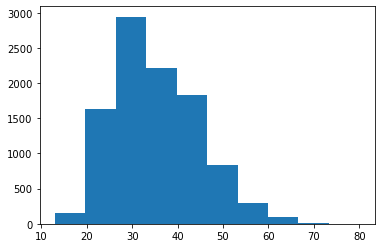

In [5]:
plt.hist(ages, bins=10)

This histogram looks relatively normally distributed. We can try generating a dataset using the mean and standard deviation of the ages Data Series.

[45.34911301 40.77663895 29.55496112 ... 31.07791004 61.96533713
 41.04442482]


(array([  1.,  13.,  50., 171., 388., 560., 528., 201.,  70.,  18.]),
 array([-2.36425226,  4.29148009, 10.94721245, 17.6029448 , 24.25867715,
        30.9144095 , 37.57014185, 44.2258742 , 50.88160655, 57.53733891,
        64.19307126]),
 <BarContainer object of 10 artists>)

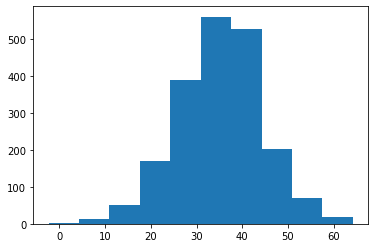

In [6]:
rng = np.random.default_rng()
vals = rng.normal(loc=ages.mean(), scale=ages.std(), size=N)
print(vals)
plt.hist(vals, bins=10)

This appears to be a pretty close approximation of the age Data Series so we will use the variable vals to synthesise age data. Next we consider the probability that a summitter climbed without oxygen. 

In [7]:
noOxygen = dfml.loc[dfml.loc[:,'Oxy'] == 0]
noOxygen.describe()

,Year,Season,Age,Oxy,Dth
count,213.000000,213.000000,213.000000,213.0,213.000000
mean,2000.680751,1.309859,35.394366,0.0,0.065728
std,10.407792,0.725380,6.350187,0.0,0.248389
min,1978.000000,1.000000,20.000000,0.0,0.000000
25%,1993.000000,1.000000,31.000000,0.0,0.000000
50%,2001.000000,1.000000,35.000000,0.0,0.000000
75%,2010.000000,1.000000,40.000000,0.0,0.000000
max,2019.000000,4.000000,55.000000,0.0,1.000000


In [8]:
minNoOxAge = noOxygen.Age.mean() - noOxygen.Age.std()*3
maxNoOxAge = noOxygen.Age.mean() + noOxygen.Age.std()*3

print('Minimum age for no oxygen attempt is {} and maximum age is {}.'.format(round(minNoOxAge,2), round(maxNoOxAge,2)))

Minimum age for no oxygen attempt is 16.34 and maximum age is 54.44.


A recent [experiment](https://abcnews.go.com/Health/story?id=2955209&page=1) at Everest Base Camp and the [successful ascent](https://www.nytimes.com/2010/05/20/sports/20climber.html) of a 13 year old show the controversy around the ethics of minors at high altitude.

In [9]:
noOxPotential = df[(df['Age'] >= 18) & (df['Age'] <= 55)].Age.count() 
noOxPotential

9699

We can look at the historical data to get an idea of the probability that a climber will not use oxygen in their attempt. We can count the number of climbers in total who have used oxygen and divide it by the total number of summitters in the appropriate age range determined above.

In [10]:
noOxProbability = noOxygen.Age.count() / noOxPotential
oxProbability = 1 - noOxProbability
oxProbability

0.9780389730900093

Calculate use of oxygen synthetic data

In [11]:
oxUse = []
for a in vals:
    if a >= 18 and a <= 55:
        oxUse.append(rng.binomial(1, oxProbability))
    else:
        oxUse.append(1)
print(oxUse)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Calculate the probabilities of climbing in each season.

In [12]:
sprCount = dfml.loc[dfml.loc[:,'Season'] == 1].Season.count()
sumCount = dfml.loc[dfml.loc[:,'Season'] == 2].Season.count()
autCount = dfml.loc[dfml.loc[:,'Season'] == 3].Season.count()
winCount = dfml.loc[dfml.loc[:,'Season'] == 4].Season.count()

sprProb = sprCount / df.Season.count()
sumProb = sumCount / df.Season.count()
autProb = autCount / df.Season.count()
winProb = winCount / df.Season.count()

seasProbs = [sprProb, sumProb, autProb, winProb]
seasProbs

[0.9692307692307692,
 0.0008991008991008991,
 0.028371628371628373,
 0.0014985014985014985]

Generate a set of seasons chosen by each climber in the synthetic dataset.

In [13]:
seas = [1, 2, 3, 4]
seasList = []

for i in range(0, N):
    seasChoice = random.choices(seas, weights=seasProbs)
    seasList.append(seasChoice[0])

print(seasList)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Compile list with climber number, ages, season and oxygen use.

In [14]:
historicalDeathRate = round(dfml[(dfml['Dth'] == 1)].Dth.count() / dfml.Dth.count(),3)
print(historicalDeathRate)

0.008


In [15]:
#predictDeathRate = round(synEverestDataDf[(synEverestDataDf['Survived'] == 'Died')].Survived.count() / synEverestDataDf.Survived.count(),3)
#print(predictDeathRate)

In [16]:
synthEverestData = []


for i in range(0, N):
    data = []

    data = [seasList[i], round(vals[i],0), oxUse[i]]
    synthEverestData.append(data)

synthEverestDataDf = pd.DataFrame(synthEverestData, columns=['Season', 'Age', 'Oxy'])

In [17]:
inputs = dfml[['Season', 'Age', 'Oxy']]
outputs = dfml['Dth']

In [18]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [21]:
rate = sum(knn.predict(synthEverestDataDf[['Season', 'Age', 'Oxy']]))
rate

0